In [292]:
import cal_clock, cal_fifo, cal_lru, cal_opt
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


Tiền xử lý dữ liệu

In [293]:
data = pd.DataFrame(columns=["listpage","lenght", "frame", "opt", "lru", "fifo", "clock"])
data1 = pd.DataFrame(columns=["listpage","lenght", "frame", "opt", "lru", "fifo", "clock"])
data2 = pd.DataFrame(columns=["listpage","lenght", "frame", "opt", "lru", "fifo", "clock"])

time= pd.DataFrame(columns=["lenght", "frame", "opt", "lru", "fifo", "clock"])
time1= pd.DataFrame(columns=["lenght", "frame", "opt", "lru", "fifo", "clock"])
time2= pd.DataFrame(columns=["lenght", "frame", "opt", "lru", "fifo", "clock"])

Tạo dữ liệu

In [294]:
x=500
capacity= 10
listpage = [np.random.randint(1, 10) for i in range(x)]
print('OPT:',cal_opt.opt(listpage, capacity))
print('LRU:',cal_lru.lru(listpage, capacity))
print('FIFO:',cal_fifo.fifo(listpage, capacity))
print('CLOCK:',cal_clock.clock(listpage, capacity))

OPT: (9, 0.00014436399942496791)
LRU: (9, 0.0003157270002702717)
FIFO: (9, 6.42180002614623e-05)
CLOCK: (9, 0.00016021700048440835)


frame = 4, 7, 10

In [295]:
for i in range(20, 1001):
    listpage = [np.random.randint(1, 10) for i in range(i)]
    p_opt, t_opt = cal_opt.opt(listpage, 4)
    p_lru, t_lru = cal_lru.lru(listpage, 4)
    p_fifo, t_fifo = cal_fifo.fifo(listpage, 4)
    p_clock, t_clock = cal_clock.clock(listpage, 4)
    data=data.append({'listpage':listpage,"lenght": len(listpage), 'frame': 4, 'opt':p_opt, 'lru': p_lru, 'fifo': p_fifo, 'clock': p_clock}, ignore_index= True)
    time= time.append({"lenght": len(listpage), "frame": 4, "opt": t_opt, "lru": t_lru, "fifo": t_fifo, "clock": t_clock}, ignore_index= True)
    
    p_opt, t_opt = cal_opt.opt(listpage, 7)
    p_lru, t_lru = cal_lru.lru(listpage, 7)
    p_fifo, t_fifo = cal_fifo.fifo(listpage, 7)
    p_clock, t_clock = cal_clock.clock(listpage, 7)
    data1=data1.append({'listpage':listpage,"lenght": len(listpage), 'frame': 7, 'opt':p_opt, 'lru': p_lru, 'fifo': p_fifo, 'clock': p_clock}, ignore_index= True)
    time1= time1.append({"lenght": len(listpage), "frame": 7, "opt": t_opt, "lru": t_lru, "fifo": t_fifo, "clock": t_clock}, ignore_index= True)

    p_opt, t_opt = cal_opt.opt(listpage, 10)
    p_lru, t_lru = cal_lru.lru(listpage, 10)
    p_fifo, t_fifo = cal_fifo.fifo(listpage, 10)
    p_clock, t_clock = cal_clock.clock(listpage, 10)
    time2= time2.append({"lenght": len(listpage), "frame": 10, "opt": t_opt, "lru": t_lru, "fifo": t_fifo, "clock": t_clock}, ignore_index= True)
    data2=data2.append({'listpage':listpage,"lenght": len(listpage), 'frame': 10, 'opt':p_opt, 'lru': p_lru, 'fifo': p_fifo, 'clock': p_clock}, ignore_index= True)

    '''data=data.append({'listpage':listpage,"lenght": len(listpage), 'frame': 4, 'opt':p_opt, 'lru': p_lru, 'fifo': p_fifo, 'clock': p_clock}, ignore_index= True)
    data1=data1.append({'listpage':listpage,"lenght": len(listpage), 'frame': 7, 'opt':cal_opt.opt(listpage, 7), 'lru': cal_lru.lru(listpage, 7), 'fifo': cal_fifo.fifo(listpage, 7), 'clock': cal_clock.clock(listpage, 7)}, ignore_index= True)
    data2=data2.append({'listpage':listpage,"lenght": len(listpage), 'frame': 10, 'opt':cal_opt.opt(listpage, 10), 'lru': cal_lru.lru(listpage, 10), 'fifo': cal_fifo.fifo(listpage, 10), 'clock': cal_clock.clock(listpage, 10)}, ignore_index= True)'''


In [296]:
data

,listpage,lenght,frame,opt,lru,fifo,clock
0,"[4, 6, 3, 9, 4, 3, 4, 9, 9, 9, 7, 4, 7, 3, 2, ...",20,4,7,8,10,9
1,"[2, 3, 9, 2, 8, 6, 6, 7, 6, 9, 2, 7, 5, 1, 6, ...",21,4,10,15,13,13
2,"[5, 7, 8, 7, 4, 2, 5, 9, 3, 4, 5, 9, 2, 1, 7, ...",22,4,11,15,15,15
3,"[5, 3, 6, 2, 9, 8, 6, 9, 5, 2, 2, 6, 7, 3, 4, ...",23,4,12,16,15,17
4,"[2, 8, 2, 1, 7, 4, 4, 3, 4, 6, 7, 6, 5, 2, 6, ...",24,4,10,14,11,15
...,...,...,...,...,...,...,...
976,"[1, 2, 4, 4, 9, 1, 9, 5, 3, 1, 1, 9, 8, 7, 9, ...",996,4,337,556,572,557
977,"[3, 5, 8, 3, 4, 3, 1, 5, 2, 6, 2, 8, 5, 6, 1, ...",997,4,328,539,536,537
978,"[6, 5, 6, 9, 7, 9, 3, 2, 3, 8, 8, 7, 3, 1, 1, ...",998,4,331,548,554,554
979,"[4, 3, 2, 6, 4, 2, 2, 5, 2, 3, 1, 5, 6, 6, 3, ...",999,4,336,558,561,558


In [297]:
data1

,listpage,lenght,frame,opt,lru,fifo,clock
0,"[4, 6, 3, 9, 4, 3, 4, 9, 9, 9, 7, 4, 7, 3, 2, ...",20,7,7,7,7,7
1,"[2, 3, 9, 2, 8, 6, 6, 7, 6, 9, 2, 7, 5, 1, 6, ...",21,7,8,10,10,10
2,"[5, 7, 8, 7, 4, 2, 5, 9, 3, 4, 5, 9, 2, 1, 7, ...",22,7,9,9,10,9
3,"[5, 3, 6, 2, 9, 8, 6, 9, 5, 2, 2, 6, 7, 3, 4, ...",23,7,9,11,11,10
4,"[2, 8, 2, 1, 7, 4, 4, 3, 4, 6, 7, 6, 5, 2, 6, ...",24,7,8,9,11,9
...,...,...,...,...,...,...,...
976,"[1, 2, 4, 4, 9, 1, 9, 5, 3, 1, 1, 9, 8, 7, 9, ...",996,7,101,217,233,230
977,"[3, 5, 8, 3, 4, 3, 1, 5, 2, 6, 2, 8, 5, 6, 1, ...",997,7,97,218,215,222
978,"[6, 5, 6, 9, 7, 9, 3, 2, 3, 8, 8, 7, 3, 1, 1, ...",998,7,101,223,231,221
979,"[4, 3, 2, 6, 4, 2, 2, 5, 2, 3, 1, 5, 6, 6, 3, ...",999,7,96,236,216,227


In [298]:
data2

,listpage,lenght,frame,opt,lru,fifo,clock
0,"[4, 6, 3, 9, 4, 3, 4, 9, 9, 9, 7, 4, 7, 3, 2, ...",20,10,7,7,7,7
1,"[2, 3, 9, 2, 8, 6, 6, 7, 6, 9, 2, 7, 5, 1, 6, ...",21,10,8,8,8,8
2,"[5, 7, 8, 7, 4, 2, 5, 9, 3, 4, 5, 9, 2, 1, 7, ...",22,10,9,9,9,9
3,"[5, 3, 6, 2, 9, 8, 6, 9, 5, 2, 2, 6, 7, 3, 4, ...",23,10,9,9,9,9
4,"[2, 8, 2, 1, 7, 4, 4, 3, 4, 6, 7, 6, 5, 2, 6, ...",24,10,8,8,8,8
...,...,...,...,...,...,...,...
976,"[1, 2, 4, 4, 9, 1, 9, 5, 3, 1, 1, 9, 8, 7, 9, ...",996,10,9,9,9,9
977,"[3, 5, 8, 3, 4, 3, 1, 5, 2, 6, 2, 8, 5, 6, 1, ...",997,10,9,9,9,9
978,"[6, 5, 6, 9, 7, 9, 3, 2, 3, 8, 8, 7, 3, 1, 1, ...",998,10,9,9,9,9
979,"[4, 3, 2, 6, 4, 2, 2, 5, 2, 3, 1, 5, 6, 6, 3, ...",999,10,9,9,9,9


In [299]:
time1= time1.drop(columns=['frame'])
time1.set_index('lenght', inplace=True)
print(time)

     lenght  frame       opt       lru      fifo     clock
0      20.0    4.0  0.000017  0.000013  0.000006  0.000010
1      21.0    4.0  0.000028  0.000013  0.000006  0.000010
2      22.0    4.0  0.000035  0.000013  0.000007  0.000010
3      23.0    4.0  0.000036  0.000014  0.000007  0.000011
4      24.0    4.0  0.000037  0.000015  0.000006  0.000011
..      ...    ...       ...       ...       ...       ...
976   996.0    4.0  0.003908  0.000495  0.000225  0.000384
977   997.0    4.0  0.003824  0.000558  0.000215  0.000391
978   998.0    4.0  0.003815  0.000487  0.000218  0.000393
979   999.0    4.0  0.003922  0.000486  0.000234  0.000491
980  1000.0    4.0  0.004254  0.000488  0.000222  0.000386

[981 rows x 6 columns]


In [300]:
time= time.drop(columns=['frame'])
time.set_index('lenght', inplace=True)
print(time)

             opt       lru      fifo     clock
lenght                                        
20.0    0.000017  0.000013  0.000006  0.000010
21.0    0.000028  0.000013  0.000006  0.000010
22.0    0.000035  0.000013  0.000007  0.000010
23.0    0.000036  0.000014  0.000007  0.000011
24.0    0.000037  0.000015  0.000006  0.000011
...          ...       ...       ...       ...
996.0   0.003908  0.000495  0.000225  0.000384
997.0   0.003824  0.000558  0.000215  0.000391
998.0   0.003815  0.000487  0.000218  0.000393
999.0   0.003922  0.000486  0.000234  0.000491
1000.0  0.004254  0.000488  0.000222  0.000386

[981 rows x 4 columns]


In [301]:
time2= time2.drop(columns=['frame'])
time2.set_index('lenght', inplace=True)
print(time2)

             opt       lru      fifo     clock
lenght                                        
20.0    0.000012  0.000013  0.000004  0.000008
21.0    0.000021  0.000022  0.000008  0.000014
22.0    0.000014  0.000015  0.000005  0.000009
23.0    0.000015  0.000016  0.000006  0.000009
24.0    0.000014  0.000017  0.000005  0.000010
...          ...       ...       ...       ...
996.0   0.000293  0.000644  0.000121  0.000311
997.0   0.000282  0.000652  0.000123  0.000319
998.0   0.000287  0.000656  0.000124  0.000319
999.0   0.000278  0.000655  0.000127  0.000438
1000.0  0.000294  0.000657  0.000130  0.000329

[981 rows x 4 columns]


In [302]:
df=pd.DataFrame(data)
df= data.drop(columns=['listpage', 'frame'])
df.set_index('lenght', inplace=True)
df= df.dropna()
df

,opt,lru,fifo,clock
lenght,,,,
20,7,8,10,9
21,10,15,13,13
22,11,15,15,15
23,12,16,15,17
24,10,14,11,15
...,...,...,...,...
996,337,556,572,557
997,328,539,536,537
998,331,548,554,554


In [303]:
df1=pd.DataFrame(data1, index= data1['lenght'])
df1= data1.drop(columns=['listpage', 'frame'])
df1.set_index('lenght', inplace=True)
df1= df1.dropna()
df1

,opt,lru,fifo,clock
lenght,,,,
20,7,7,7,7
21,8,10,10,10
22,9,9,10,9
23,9,11,11,10
24,8,9,11,9
...,...,...,...,...
996,101,217,233,230
997,97,218,215,222
998,101,223,231,221


In [304]:
df2=pd.DataFrame(data2, index= data2['lenght'])
df2= data2.drop(columns=['listpage', 'frame'])
df2.set_index('lenght', inplace=True)
df2= df2.dropna()
df2

,opt,lru,fifo,clock
lenght,,,,
20,7,7,7,7
21,8,8,8,8
22,9,9,9,9
23,9,9,9,9
24,8,8,8,8
...,...,...,...,...
996,9,9,9,9
997,9,9,9,9
998,9,9,9,9


Plot data


In [305]:
df.columns
label=[]
for x in df.columns:
  label.append(x.upper())
label

['OPT', 'LRU', 'FIFO', 'CLOCK']

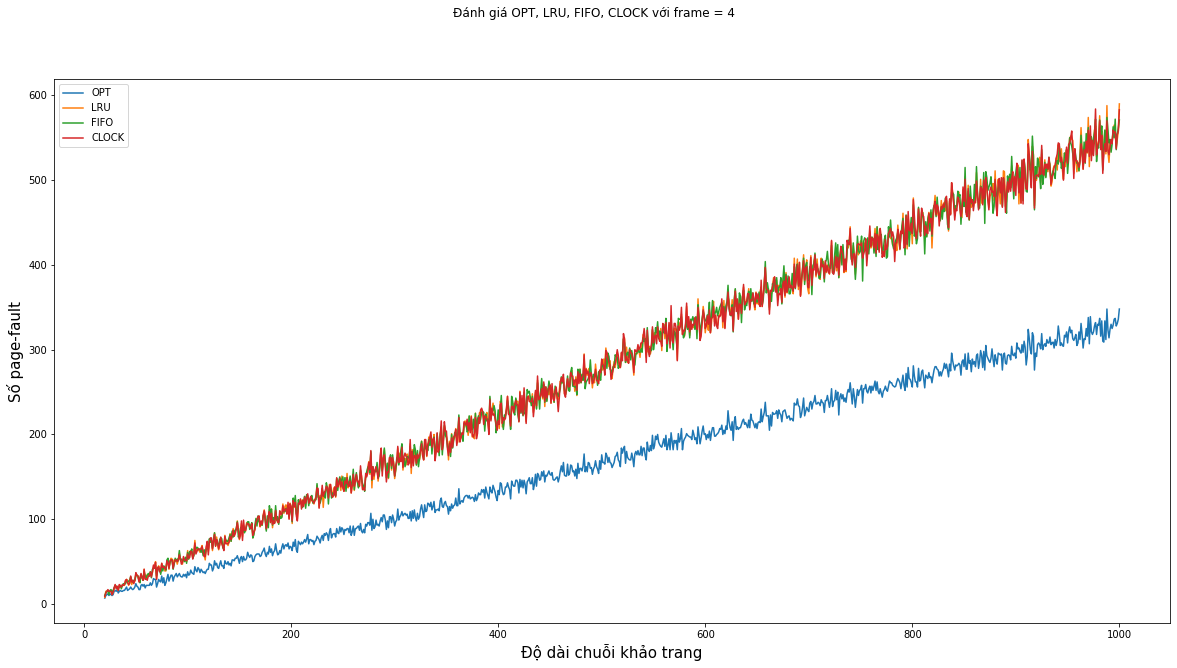

In [306]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá OPT, LRU, FIFO, CLOCK với frame = 4')
plt.plot(df)
plt.legend(label)
plt.ylabel('Số page-fault',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('f4.png')
plt.show()

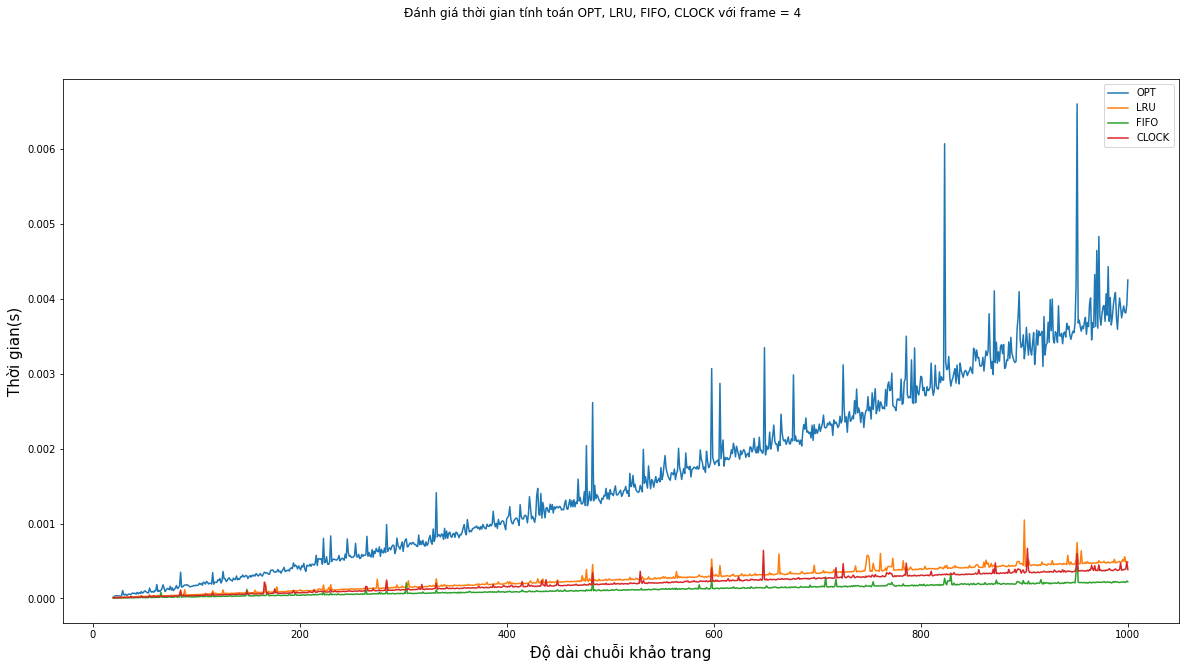

In [307]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá thời gian tính toán OPT, LRU, FIFO, CLOCK với frame = 4')
plt.plot(time)
plt.legend(label)
plt.ylabel('Thời gian(s)',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('t4.png')
plt.show()

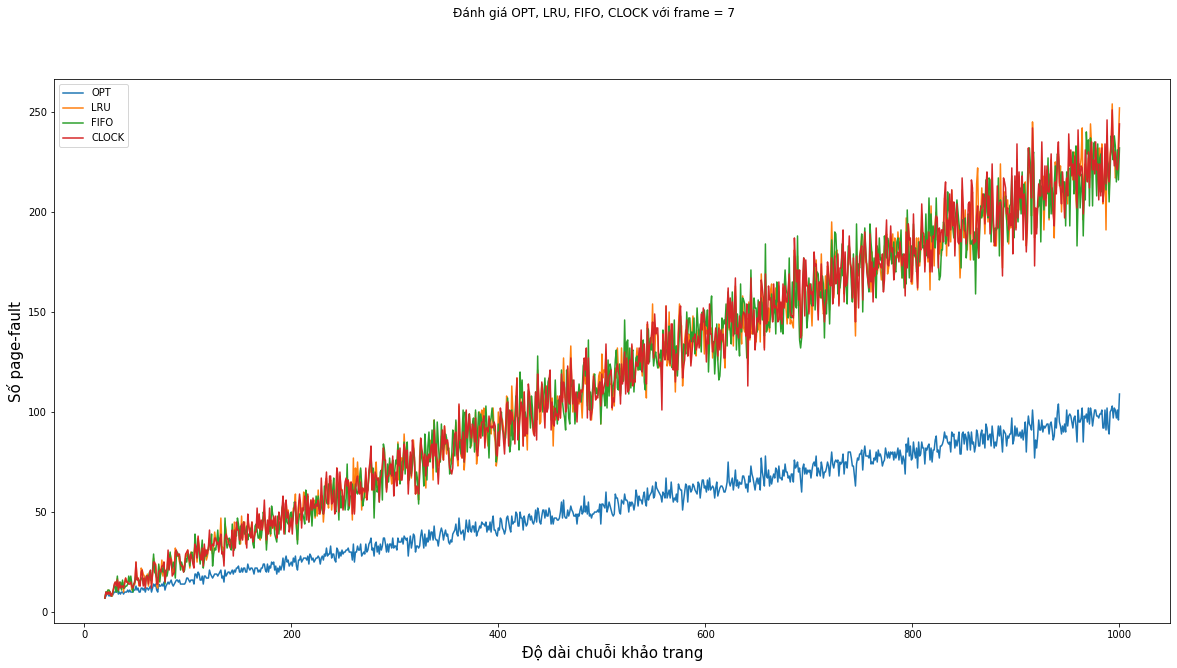

In [308]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá OPT, LRU, FIFO, CLOCK với frame = 7')
plt.plot(df1)
plt.legend(label)
plt.ylabel('Số page-fault',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('f7.png')
plt.show()

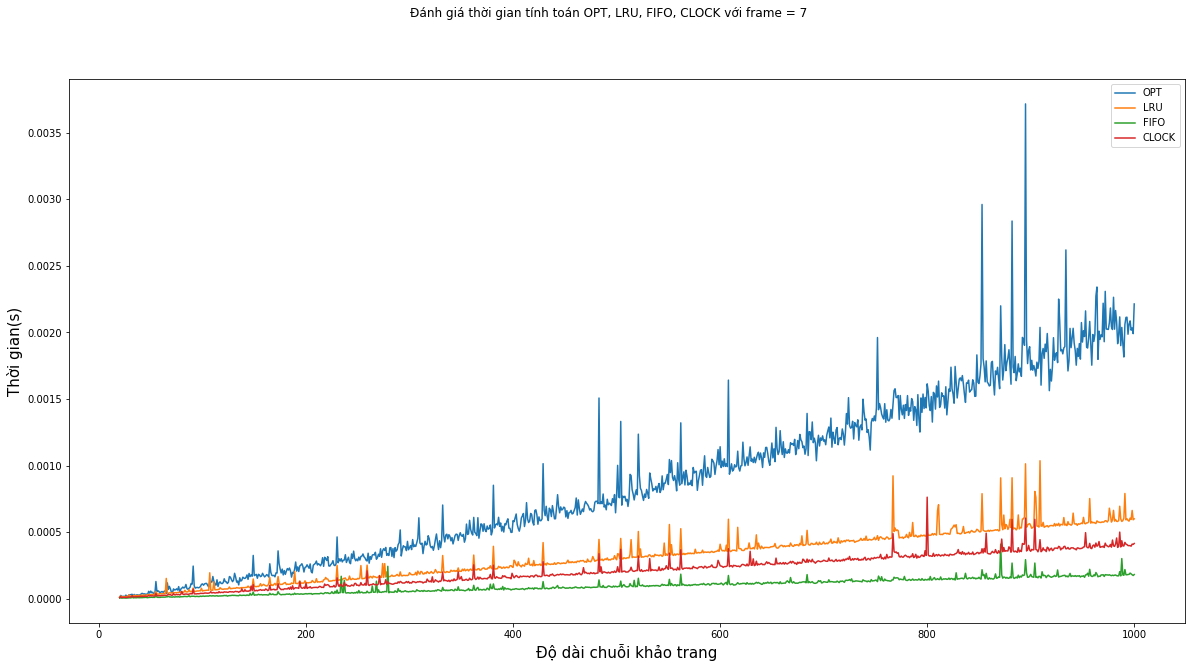

In [309]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá thời gian tính toán OPT, LRU, FIFO, CLOCK với frame = 7')
plt.plot(time1)
plt.legend(label)
plt.ylabel('Thời gian(s)',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('t7.png')
plt.show()

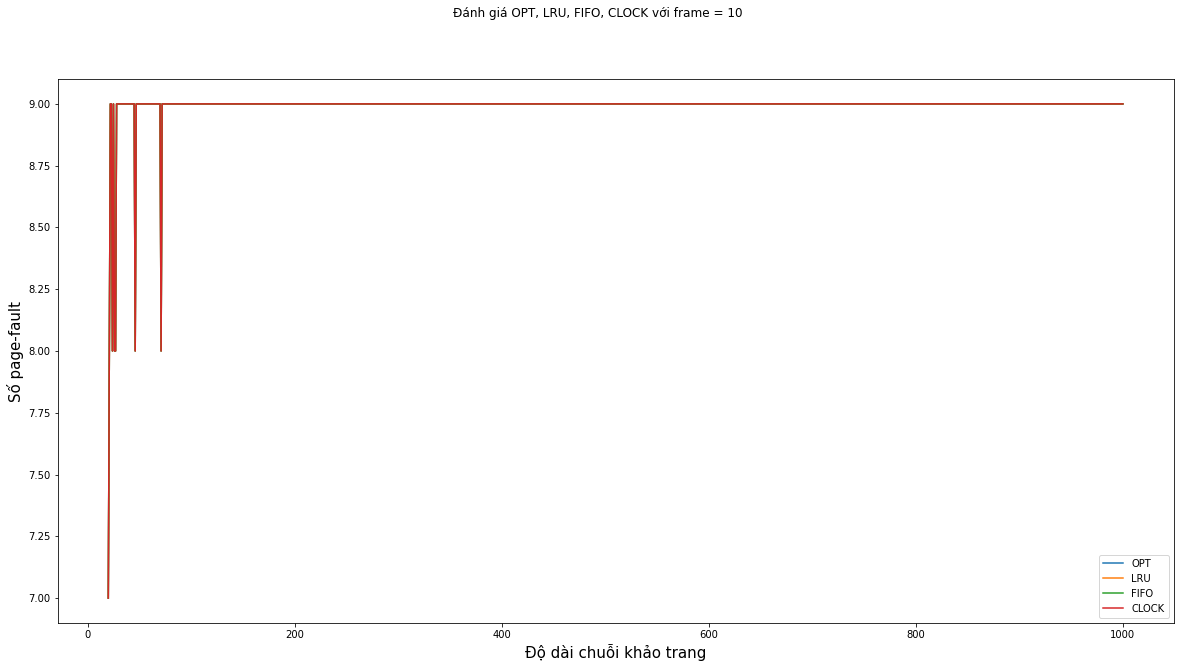

In [310]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá OPT, LRU, FIFO, CLOCK với frame = 10')
plt.plot(df2)
plt.legend(label)
plt.ylabel('Số page-fault',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('f10.png')
plt.show()


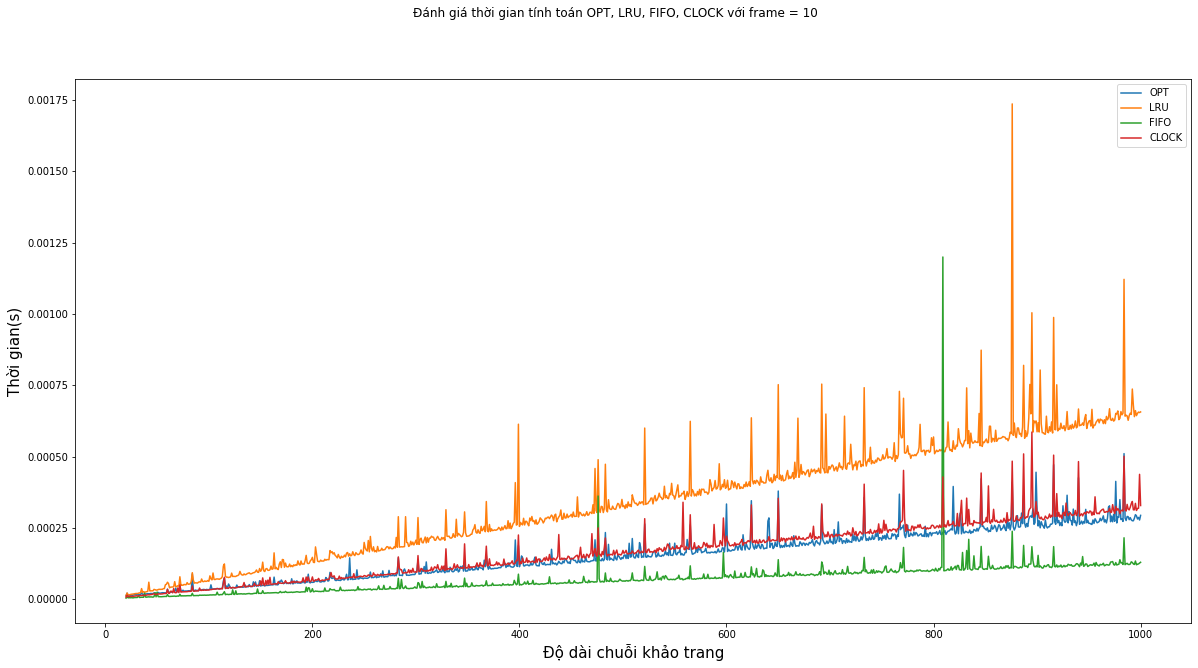

In [311]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá thời gian tính toán OPT, LRU, FIFO, CLOCK với frame = 10')
plt.plot(time2)
plt.legend(label)
plt.ylabel('Thời gian(s)',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('t10.png')
plt.show()

In [312]:
data_opt = pd.DataFrame(columns=['4 frame', '7 frame', '10 frame'])
data_opt['4 frame'] = time['opt']
data_opt['7 frame'] = time1['opt']
data_opt['10 frame'] = time2['opt']
data_opt

,4 frame,7 frame,10 frame
lenght,,,
20.0,0.000017,0.000012,0.000012
21.0,0.000028,0.000026,0.000021
22.0,0.000035,0.000018,0.000014
23.0,0.000036,0.000019,0.000015
24.0,0.000037,0.000019,0.000014
...,...,...,...
996.0,0.003908,0.002087,0.000293
997.0,0.003824,0.002018,0.000282
998.0,0.003815,0.002034,0.000287


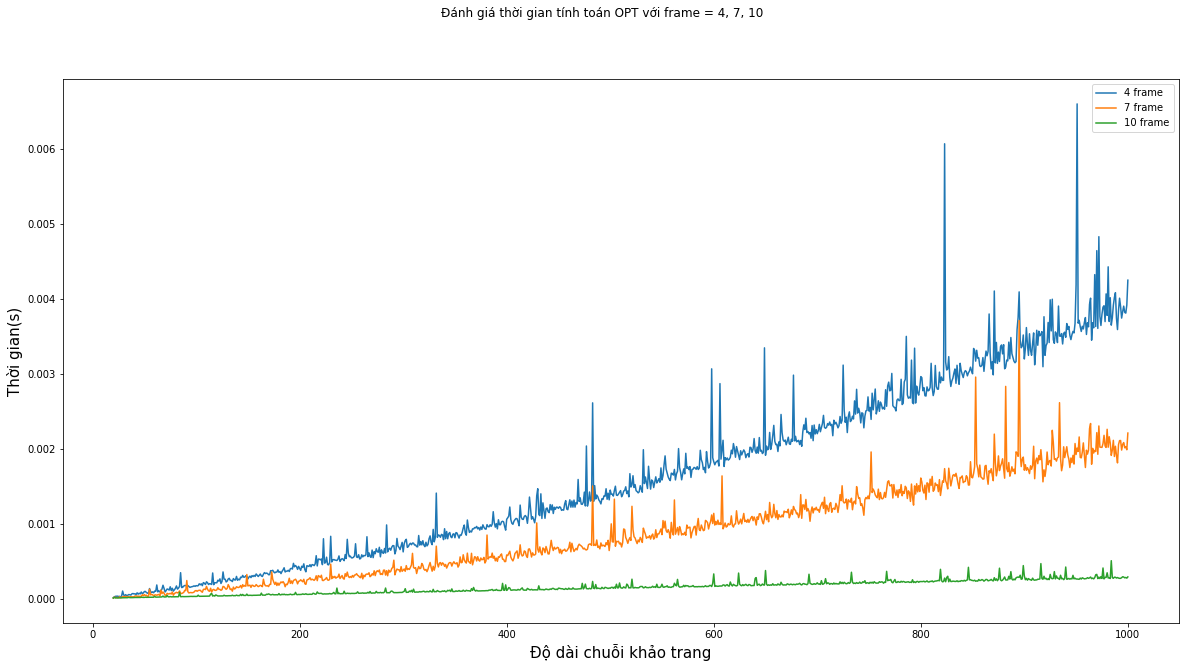

In [313]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá thời gian tính toán OPT với frame = 4, 7, 10')
plt.plot(data_opt)
plt.legend(['4 frame', '7 frame', '10 frame'])
plt.ylabel('Thời gian(s)',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('opt.png')
plt.show()

In [314]:
data_lru = pd.DataFrame(columns=['4 frame', '7 frame', '10 frame'])
data_lru['4 frame'] = time['lru']
data_lru['7 frame'] = time1['lru']
data_lru['10 frame'] = time2['lru']
data_lru

,4 frame,7 frame,10 frame
lenght,,,
20.0,0.000013,0.000013,0.000013
21.0,0.000013,0.000022,0.000022
22.0,0.000013,0.000015,0.000015
23.0,0.000014,0.000015,0.000016
24.0,0.000015,0.000017,0.000017
...,...,...,...
996.0,0.000495,0.000606,0.000644
997.0,0.000558,0.000596,0.000652
998.0,0.000487,0.000664,0.000656


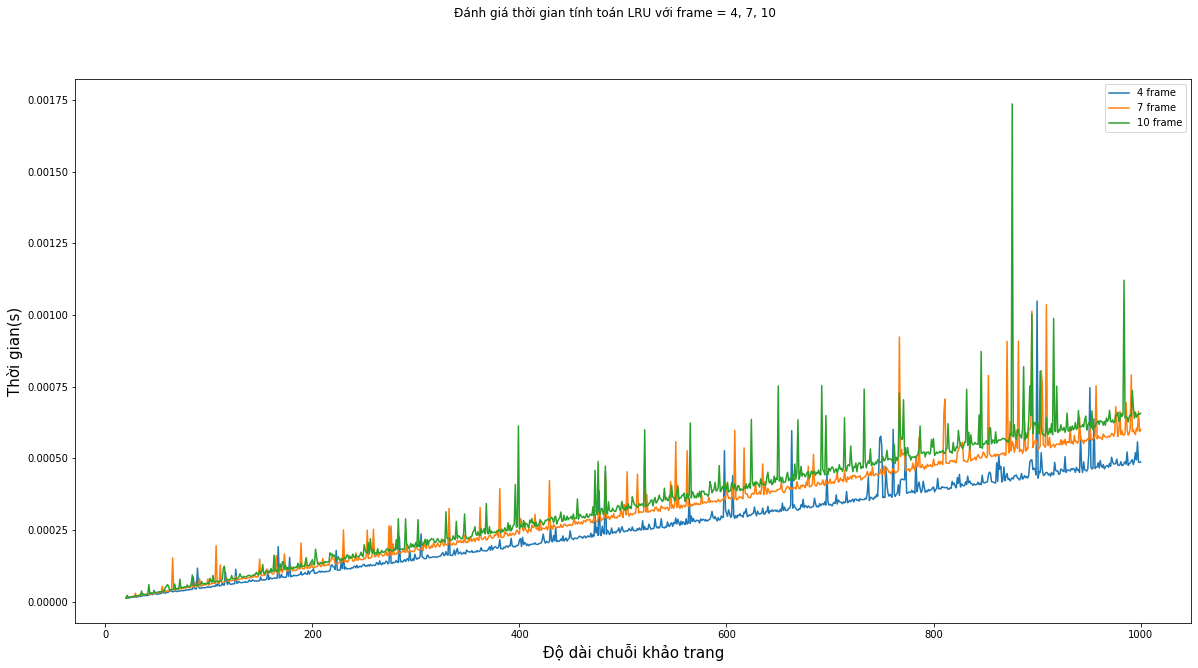

In [315]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá thời gian tính toán LRU với frame = 4, 7, 10')
plt.plot(data_lru)
plt.legend(['4 frame', '7 frame', '10 frame'])
plt.ylabel('Thời gian(s)',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('lru.png')
plt.show()

In [316]:
data_fifo = pd.DataFrame(columns=['4 frame', '7 frame', '10 frame'])
data_fifo['4 frame'] = time['fifo']
data_fifo['7 frame'] = time1['fifo']
data_fifo['10 frame'] = time2['fifo']
data_fifo

,4 frame,7 frame,10 frame
lenght,,,
20.0,0.000006,0.000006,0.000004
21.0,0.000006,0.000008,0.000008
22.0,0.000007,0.000006,0.000005
23.0,0.000007,0.000007,0.000006
24.0,0.000006,0.000007,0.000005
...,...,...,...
996.0,0.000225,0.000194,0.000121
997.0,0.000215,0.000187,0.000123
998.0,0.000218,0.000181,0.000124


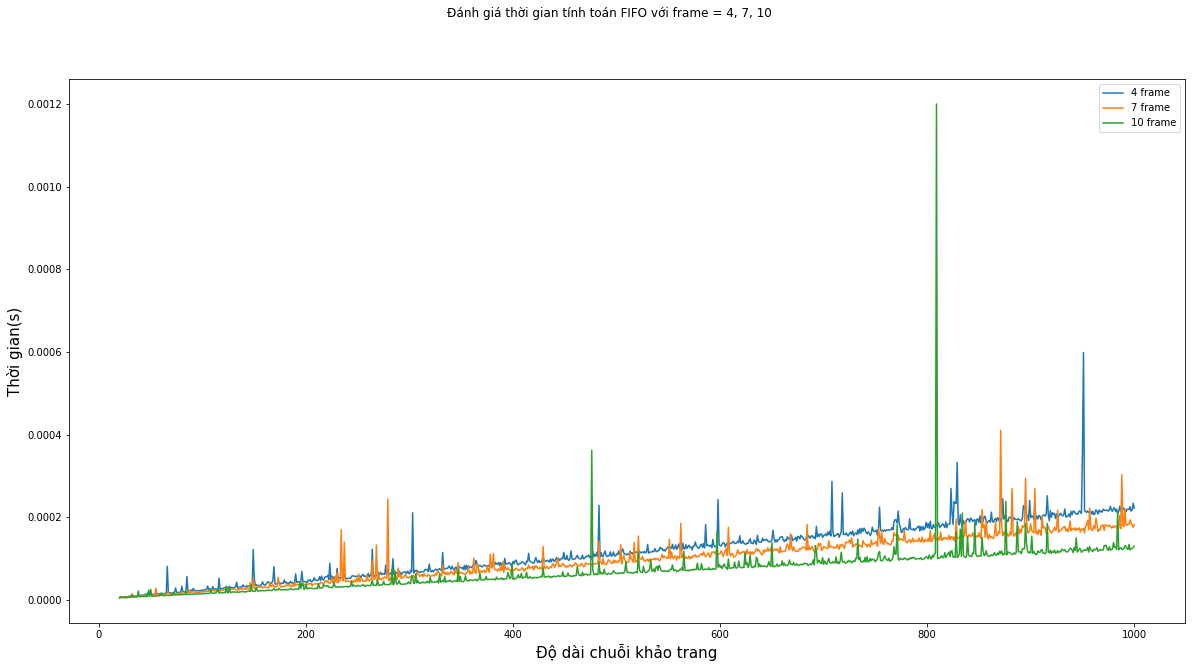

In [317]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá thời gian tính toán FIFO với frame = 4, 7, 10')
plt.plot(data_fifo)
plt.legend(['4 frame', '7 frame', '10 frame'])
plt.ylabel('Thời gian(s)',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('fifo.png')
plt.show()

In [318]:
data_clock = pd.DataFrame(columns=['4 frame', '7 frame', '10 frame'])
data_clock['4 frame'] = time['clock']
data_clock['7 frame'] = time1['clock']
data_clock['10 frame'] = time2['clock']
data_clock

,4 frame,7 frame,10 frame
lenght,,,
20.0,0.000010,0.000009,0.000008
21.0,0.000010,0.000016,0.000014
22.0,0.000010,0.000010,0.000009
23.0,0.000011,0.000011,0.000009
24.0,0.000011,0.000011,0.000010
...,...,...,...
996.0,0.000384,0.000399,0.000311
997.0,0.000391,0.000396,0.000319
998.0,0.000393,0.000411,0.000319


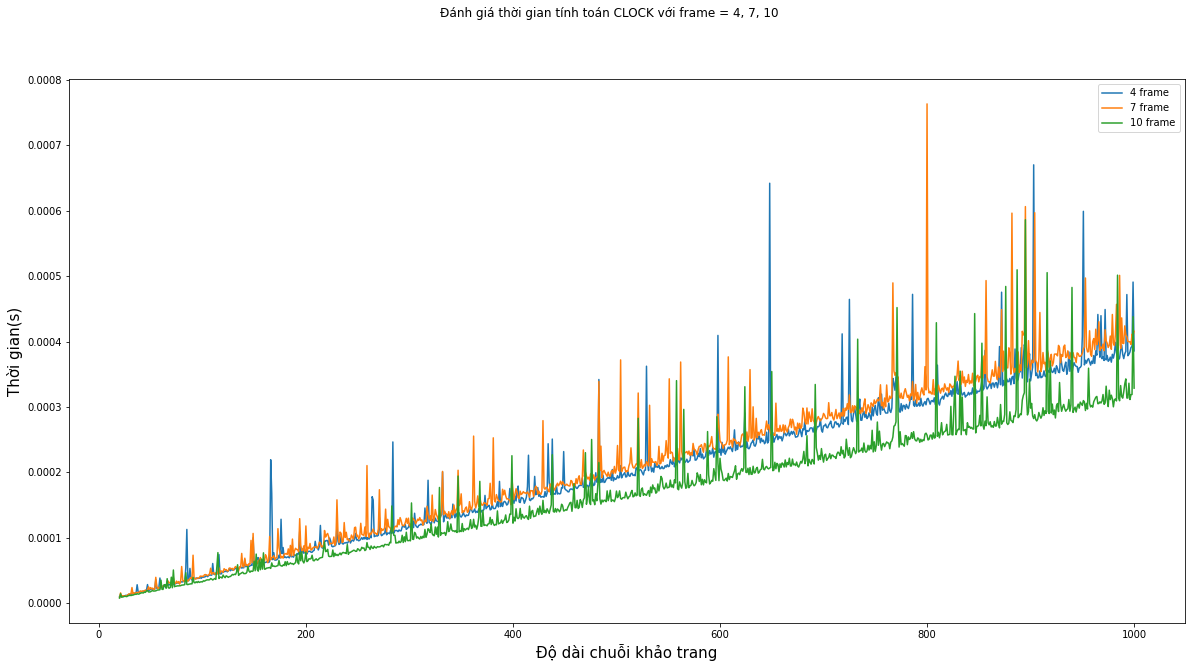

In [319]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá thời gian tính toán CLOCK với frame = 4, 7, 10')
plt.plot(data_clock)
plt.legend(['4 frame', '7 frame', '10 frame'])
plt.ylabel('Thời gian(s)',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('clock.png')
plt.show()